In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 19 - Heart Disease Prediction\heart_disease_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

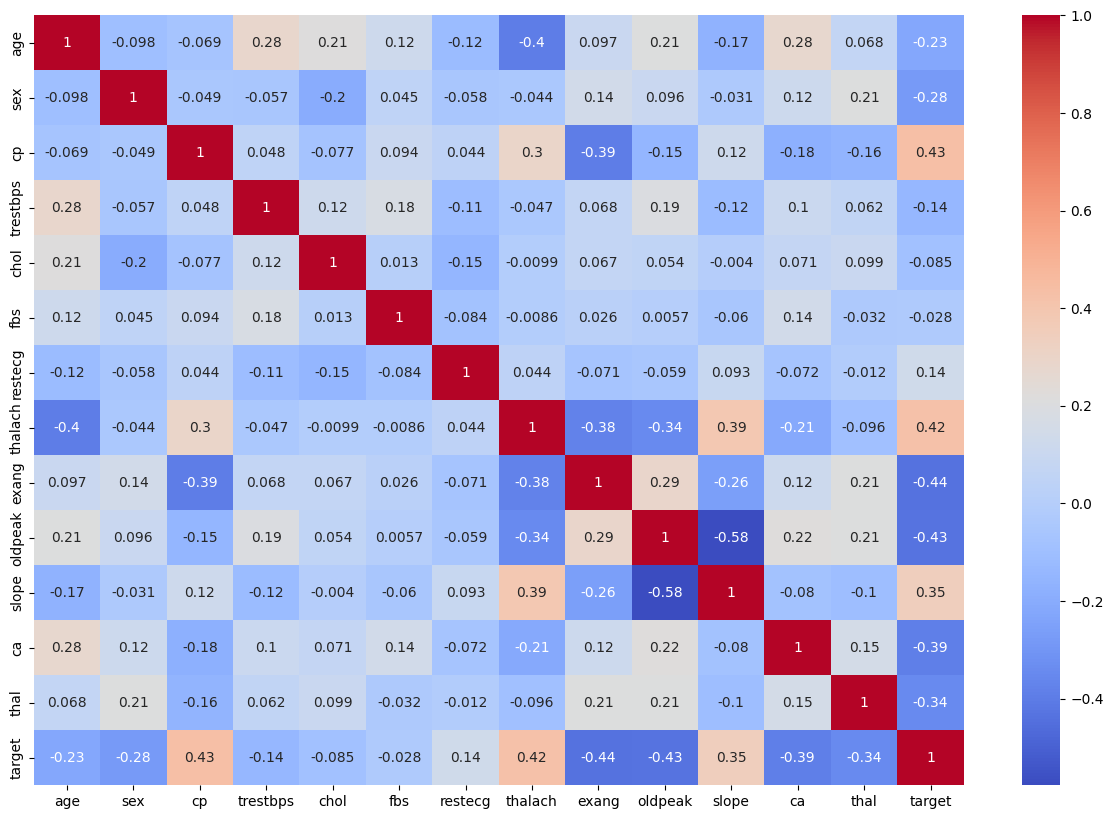

In [6]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, )

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
X = df.drop(columns = 'target')
y = df.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state= 2),
        'params': {
            'C' : [0.1, 1, 10],
            'penalty': ['l2'],
            'class_weight': ['balanced']
        }

    },
    'SVM': {
        'model': SVC(random_state= 2),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(random_state= 2),
        'params': {
            'max_depth' : [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'max_features' : ['sqrt', None],
            'n_estimators' : [100, 200],
            'class_weight': ['balanced', None]
        }
    },
    'XGBoost' : {
        'model': XGBClassifier(random_state =2),
        'params': {
            'max_depth': [2, 3 ],
            'learning_rate' : [0.01, 0.05],
            'min_child_weight' : [5, 10],
            'subsample': [0.6, 0.7],
            'colsample_bytree': [0.6, 0.7],
            'n_estimators' : [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1, 2]
        }
    }
}

In [27]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'f1',
        n_jobs = -1,
        verbose= 1 
    )

    grid_search.fit(X_train_scaled, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train_scaled)
    test_pred = grid_search.best_estimator_.predict(X_test_scaled)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params' : grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1' : f1_score(y_train, train_pred),
        'Test F1' : f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': precision_score(y_test, test_pred)

    }

best_model_name = max(results.keys(), key=lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best_model']

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [28]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train Accuracy': result['Train Accuracy'],
        'Test Accuracy': result['Test Accuracy'],
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(4)
summary_df = summary_df.sort_values('Test F1', ascending=False).reset_index(drop=True)
print(summary_df.to_string(index = False))

             Model  Train Accuracy  Test Accuracy  Train F1  Test F1  Precision  Recall
     Random Forest          0.9339         0.9016    0.9420   0.9062     0.8286  0.8286
LogisticRegression          0.8512         0.8689    0.8705   0.8750     0.8000  0.8000
               SVM          0.8512         0.8689    0.8686   0.8710     0.8182  0.8182
           XGBoost          0.8843         0.6066    0.9000   0.7073     0.5472  0.5472


In [29]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.78      0.72      0.75        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Confusion Matrix:
[[26  6]
 [ 8 21]]


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [30]:
best_model

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
